In [1]:
import matplotlib.pyplot as plt
import cv2

In [22]:
cat = cv2.imread('PetImages/Cat/1.jpg')

In [23]:
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

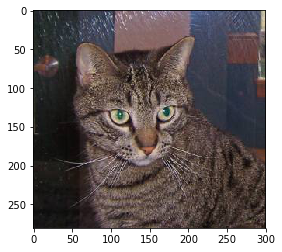

In [24]:
plt.imshow(cat)

In [25]:
cat.shape

(281, 300, 3)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

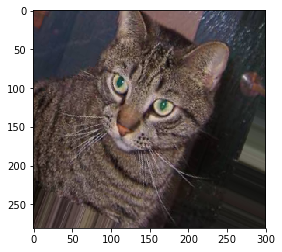

In [29]:
plt.imshow(image_gen.random_transform(cat))

In [32]:
# generate from the directory
image_gen.flow_from_directory('CAT_DOG/train')

Found 1600 images belonging to 2 classes.


In [34]:
input_shape = (150,150,3)

In [37]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [38]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) # neuron randomly turn off during training to reduce overfitting

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [44]:
# now training the data
batch_size = 16
train_image_gen = image_gen.flow_from_directory("CAT_DOG/train",
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 1600 images belonging to 2 classes.


In [45]:
test_image_gen = image_gen.flow_from_directory("CAT_DOG/test",
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 402 images belonging to 2 classes.


In [46]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [49]:
results = model.fit_generator(training_image_gen,epochs=1,steps_per_epoch=50,
                             validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
50/50 [==============================] - 28s 551ms/step - loss: 0.6991 - acc: 0.4825 - val_loss: 0.6919 - val_acc: 0.5000


In [51]:
results.history['acc'] # in each epoch

[0.4825]

In [53]:
model.save('cat_dog_model.h5')

In [52]:
# predict on new images
from keras.models import load_model

In [54]:
new_model = load_model('cat_dog_model.h5')

In [55]:
dog_file = "CAT_DOG/test/DOG/10.jpg"

In [56]:
from keras.preprocessing import image

In [57]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [58]:
dog_img = image.img_to_array(dog_img)

In [59]:
dog_img.shape

(150, 150, 3)

In [60]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [64]:
dog_img.shape # (250,250,3) -> (1,255,155,3)

(1, 150, 150, 3)

In [66]:
model.predict_classes(dog_img)

array([[1]])

In [70]:
predicted = model.predict(dog_img)

In [72]:
predicted

array([[0.99988174]], dtype=float32)